<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [188]:
iris=load_iris()

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

num_of_neighbours= 5

In [84]:
def nearest_neighbours(row,dataset,k):
    dis,index=[],[]
    for i in range(len(dataset)):
        dis.append(np.linalg.norm(row-dataset[i]))
    index=np.argsort(dis)  
    dis=np.sort(dis) 
    return dis[:k],index[:k]

In [85]:
def voting_function(labels,index):
    value=[]
    for i in range(len(index)):
        value.append(labels[index[i]])
    return max(set(value), key = value.count)

In [86]:
def accuracy(predict,actual):
    count=0
    for i in range(len(predict)):
        if predict[i]==actual[i]:
            count=count+1
    return(count/len(predict))

from scartch accuracy percentage 98.00%


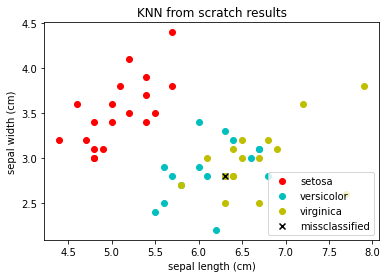

In [204]:
dis,index,predict=[],[],[]

for i in range(len(X_test)):
    dis,index=nearest_neighbours(X_test[i],X_train,num_of_neighbours)
    predict.append(voting_function(y_train,index))
    
print('from scartch accuracy percentage {:.2%}'.format(accuracy(predict,y_test))) 

classes = np.append(iris.target_names,np.array(['missclassified']))

for target in set(y_test):
  if predict[i] == y_test[i]:
    x_val = [X_test[i,0] for i in range(len(y_test)) if y_test[i]==target]
    y_val = [X_test[i,1] for i in range(len(y_test)) if y_test[i]==target]
    plt.scatter(x_val, y_val, color=['r', 'c', 'y'][target ], label=classes)

x_val = [X_test[i,0] for i in range(len(y_test)) if y_test[i]!=predict[i]]
y_val = [X_test[i,1] for i in range(len(y_test)) if y_test[i]!=predict[i]]
plt.scatter(x_val, y_val, color='k', marker='x', label=classes)


plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('KNN from scratch results')
plt.legend(classes, loc='lower right')
plt.show()

Sklearn accuracy percentage 98.00%


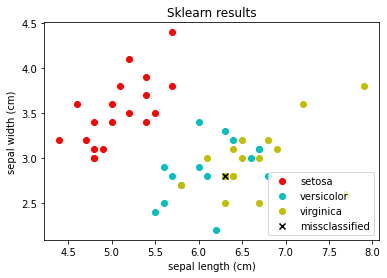

In [205]:
neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
print('Sklearn accuracy percentage {:.2%}'.format(neigh.score(X_test, y_test)))

sk_pred = neigh.predict(X_test)

for target in set(y_test):
  if predict[i] == y_test[i]:
    x_val = [X_test[i,0] for i in range(len(y_test)) if y_test[i]==target]
    y_val = [X_test[i,1] for i in range(len(y_test)) if y_test[i]==target]
    plt.scatter(x_val, y_val, color=['r', 'c', 'y'][target ], label=classes)

x_val = [X_test[i,0] for i in range(len(y_test)) if y_test[i]!=sk_pred[i]]
y_val = [X_test[i,1] for i in range(len(y_test)) if y_test[i]!=sk_pred[i]]
plt.scatter(x_val, y_val, color='k', marker='x', label=classes)


plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Sklearn results')
plt.legend(classes, loc='lower right')
plt.show()
